# Linear Regression with Gradient Descent
This notebook is my first attempt to use Gradient Descent alongside the MSE (Mean Square Error) function to find a slope and y-intercept that minimzes the MSE for a set of generated $x$ and $y$ values. 

The equation I'm attempting to optimize is $ y = weight \cdot x + bias $ based on the equation for a line: $y = mx + b$.
The inputs ($x$) and outputs ($y$) will be array of 50 numbers. 

## 0. Import the Necessary Packages
This is pretty straight forward, numpy and random for data manipulation, matplotlib and it's derivatives for plotting, and a few typing imports for type annotations throughout the document   

In [1]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from typing import List, Tuple
import random

## 1. Generating Data
To generate some data to play around with, I first created a standard line using $y = mx + b$ with randomly generated values for $m$ and $b$ and then using that line creating an array of 50 random values that originate from the integers 0 to 50 that are shifted ($\pm 10$) by a random amount. Then using the equation, evaluating those generated $x$ values with the generated linear function to get a set of $y$ values that are also shifted by a random amount ($\pm 30$).  

In [2]:
# Generate random linear equation in form of y = m*x + b to form data with
slope: float = random.uniform(-10.0, 10.0)
y_int: float = random.uniform(-10.0, 10.0)
seed_line = "Seed function: y = " + str(round(slope, 2)) + "x + " + str(round(y_int, 2))

# Generate array of points at random distance from generated line
x: 'array' = np.array([round(i - random.uniform(-10.0, 10.0), 2) for i in range(0, 50)])
y: 'array' = np.array([round(i * slope + y_int + random.uniform(-30.0, 30.0), 2) for i in x])

## 1.1 Plotting the Generated Data
Now that I have generated a set of $x$ and $y$ values lets see what it looks like. Using the matplotlib library,
I can plot the points we generated on a grid. I think it's always fun to see the data.

Alongside this, we can plot the seed linear function used to generate the data too just to see it there.

Importantly, there is a calculation for the line of best fit using the least square fit (this derives the optimal solution the MSE function will tend towards, this line is a useful benchmark to test the accuracy of the equation derived through the gradient descent method. Now some might wonder why the gradient descent is even necessary given there is a convenient formula to get the same answer without iterating thousands of times, but isn't the machine learning way more fun?

<IPython.core.display.Javascript object>


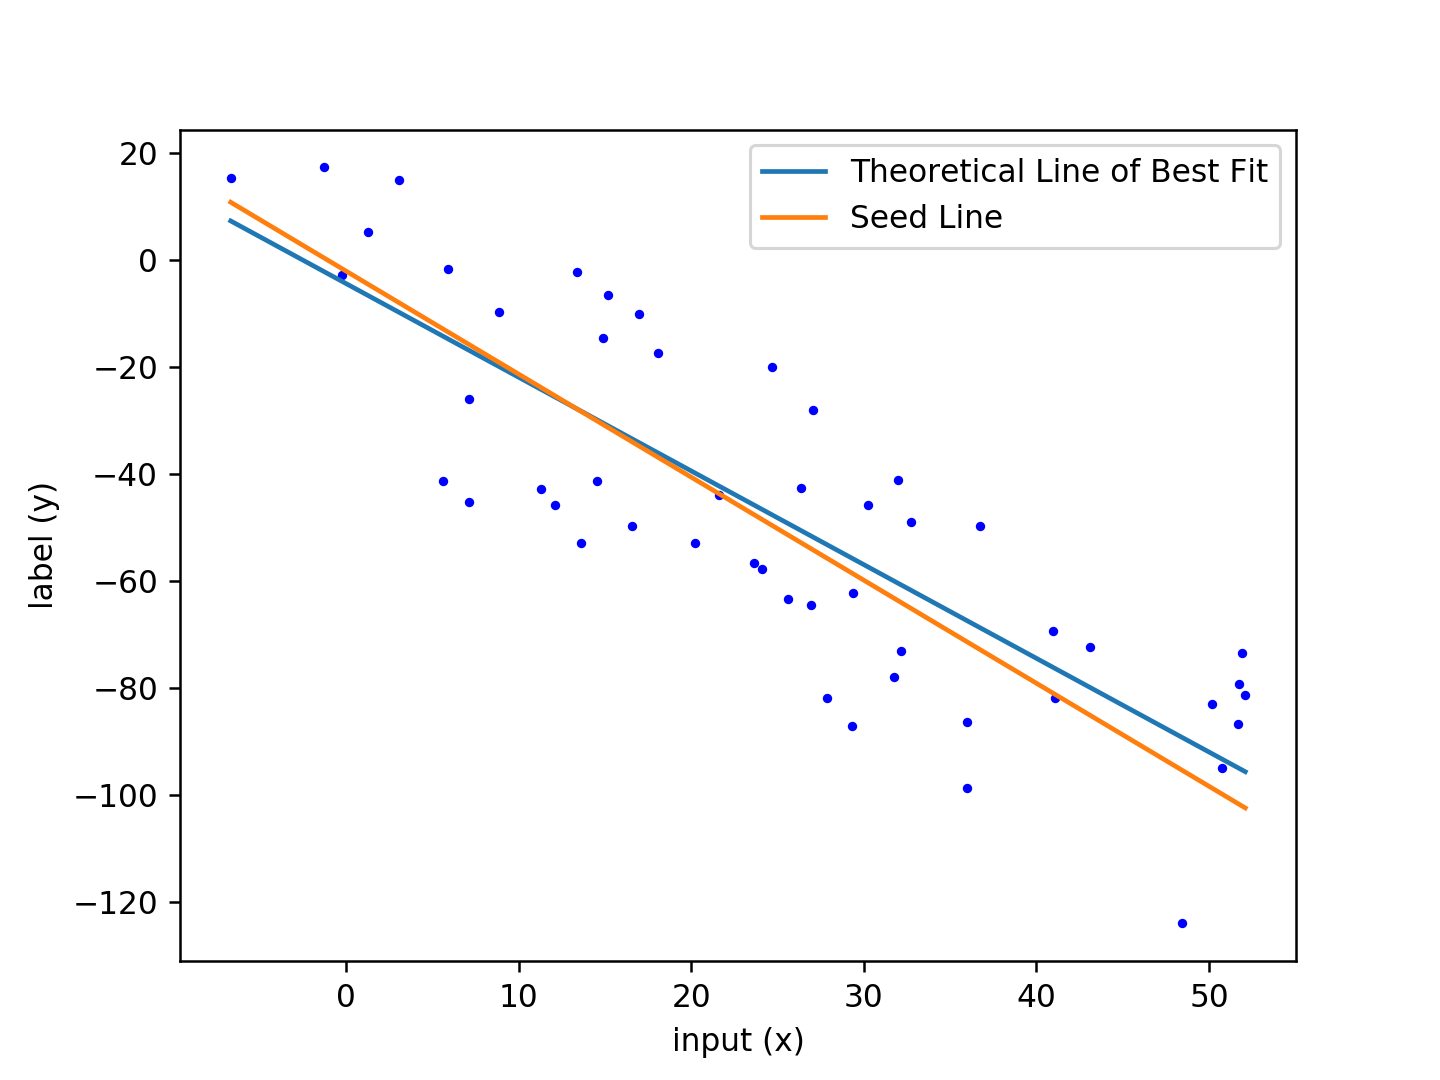

Seed function: y = -1.92x + -2.13
Actual Line of Best Fit: y = -1.75x + -4.46 cost = 330.55


In [11]:
# Plot data points on grid for better visulalization
%matplotlib notebook
plt.plot(x, y, 'bo', markersize=2)
plt.xlabel("input (x)")
plt.ylabel("label (y)")
min_x, max_x = min(x), max(x)

# This is convenient shortening of a commonly used value
n: int = len(x)
    
# Plot line of best fit with linear regression equation to see optimal answer
# y = coeff * x + const
# Use least square fit method to find correct linear equation, useful to compare to grad desc progress later
coeff: float = \
    ((n * np.sum([i * j for i, j in zip(x, y)])) - (sum(x) * sum(y))) / ((n * np.sum([i ** 2 for i in x])) - (sum(x) ** 2)) 
const: float = round(((sum(y)/n) - coeff * (sum(x)/n)), 2)
coeff: float = round(coeff, 2)
lobf_cost: float = round((1 / n) * np.sum([((y_obs - (x_obs * coeff + const)) ** 2) for x_obs, y_obs in zip(x, y)]), 2)

theoretical_lobf = "Actual Line of Best Fit: y = " + str(coeff) + "x + " + str(const) + " cost = " + str(lobf_cost)
print(seed_line + "\n" + theoretical_lobf)

# plot line of best fit
line1 = plt.plot([min_x, max_x], [(min_x * coeff) + const, (max_x * coeff) + const], label="Theoretical Line of Best Fit")
line2 = plt.plot([min_x, max_x], [(min_x * slope) + y_int, (max_x * slope) + y_int], label="Seed Line")
plt.legend()
plt.show()

## 2. The Cost Function
As I discussed above, I'm using the mean square error function to find the cost at each weight and bias value that the function is given.

The MSE equation in it's essence takes the sum of square distance from a line to each point, punishing for points that are more distant significantly more. This motivates for the optimal line that minimizes the distance to all points.
Given a two arrays $x$ and $y$ of length $n$ :
$$ MSE = \dfrac{1}{n} \sum_{i = 0}^{n-1}(y_{i_{observed}} - y_{i_{predicted}})^{2}$$

Where the predicted $y$-value is calculated using the weight and bias argument as follows: $y_{i_{predicted}} = weight\cdot x_{i_{observed}} + bias$

In [4]:
# Find mean squared error (L2 loss => | || \n || |-- get it? its the loss meme)
def cost_function(x: 'array', y: 'array', weight: float, bias: float) -> float:
    # weight * x_i_observed + bias = y_i_predicted
    # cost = 1/n * sum_{0}^{n-1} ((y_i_observed - y_i_predicted) ^ 2)
    n = len(x)
    cost = (1 / n) * np.sum([((y_obs - (x_obs * weight + bias)) ** 2) for x_obs, y_obs in zip(x, y)])
    
    return cost

## 3. Stochastic Gradient Descent
Gradient descent is used to find the minimum of the cost function by iterating several thousand times, trending towards a local minimum of the function. To find the direction of steepest ascent, you can use the partial derivative at a certain point. 
To find the direction of steepest ascent, I can find the component vector by finding the partial derivative for each direction. In this specific example, since there are only two variables, finding the partial derivative of the cost function with respect to weight gives us the weight component, and wrt bias gives the bias component. Since we want to descend the gradient, using the negative value will give us the direction of descent.

The negative partial derivatives are calculated to be the following:

$$-\dfrac{\partial (MSE)}{\partial w} = -2\cdot\frac{1}{n} \sum_{i=0}^{n-1} \left(x_{i_{observed}} \left(y_{i_{observed}} - y_{i_{predicted}}\right)\right)$$

$$-\dfrac{\partial (MSE)}{\partial b} = -2\cdot\frac{1}{n} \sum_{i=0}^{n-1} \left(y_{i_{observed}} - y_{i_{predicted}}\right)$$

Then, the weights and biases are updated with the learning rate as a multiplier to ensure the movement towards the minimum doesn't overshoot too much, but progresses towards the minimum.

$$weight_{new} = weight_{current} - \alpha \cdot \dfrac{\partial (MSE)}{\partial w}$$

$$bias_{new} = bias_{current} - \alpha \cdot \dfrac{\partial (MSE)}{\partial b}$$

Note: $y_{i_{predicted}} = weight\cdot x_{i_{observed}} + bias$, $\alpha$ is the learning rate, and $n$ is the length of the data set

In [5]:
# do the real stuff - gradient descent function: default learning rate to 0.01
def gradient_descent(x: 'array', y: 'array', weight: float, bias: float, learning_rate: float) -> Tuple[float]:
    w_grad_asc: float = 0  # partial derivative (deriv func wrt weight)
    b_grad_asc: float = 0  # partial derivative (deriv func wrt bias) 
    n = len(x)
    
    # y_i_predicted = weight * x_i_observed + bias
    # w gradient ascent (df/dw) = (2 / n) * sum_{i = 0} ^ {n - 1} (x_i_observed * (y_i_observed - y_i_predicted))
    w_grad_asc = (-2 / n) * np.sum([(x_obs * (y_obs  - (weight * x_obs + bias))) for x_obs, y_obs in zip(x, y)])
    
    # b gradient ascent (df/db) = (2 / n) * sum_{i = 0} ^ {n - 1}  (y_i_observed - y_i_predicted)
    b_grad_asc = (-2 / n) * np.sum([(y_obs - (weight * x_obs + bias)) for x_obs, y_obs in zip(x, y)])
    
    # for gradient descent, we will need to subtract (descent => -ascent), then multiply by learning rate
    weight -= w_grad_asc * learning_rate
    bias -= b_grad_asc * learning_rate
    
    return weight, bias

## 4. Training
Training is essentially just updating the initial weight and balance several thousand times by using the gradient descent function to approach the local minimum over the iterations. The number of iterations are commonly reffered to as the number of epochs. 
Because we want to visualize the progress over time, we will log the weights, biases, and costs over the iterations in 3 arrays.
These arrays will also be helpful to plot the progress later.

In [6]:
# feed data through grad desc over many iterations to update values
def train(x: 'array', y: 'array', weight: float, bias: float, learning_rate: float, epochs: int) -> Tuple['array']:
    # To log progress of training
    costs: 'array' = np.zeros(epochs)
    weights: 'array' = np.zeros(epochs)
    biases: 'array' = np.zeros(epochs)
        
    for i in range(epochs):
        # update values over iterations based on reducing cost
        weight, bias = gradient_descent(x, y, weight, bias, learning_rate)
        weights[i] = weight
        biases[i] = bias
        costs[i] = cost_function(x, y, weight, bias)

    return weights, biases, costs

## 4.1 Actually Training the Model
Now that there's a handy function to train the model, might as well train it to the generated data set.
Firstly, a random initial value is assigned as a weight and bias value. A learning rate is also set here, the learning rate is a hyperparameter that can be tuned finely to achieve optimal training. From then, the train function is called and the model is trained. Then I print the final value of the weight and bias after the training along side the equation from the least square fit so we can compare the values of the slope and $y$-intercept.

In [7]:
# train to optimize to the generated data set
weight: float = 10.0  # random init value
bias: float = 10.0  # random init value
learning_rate: float = 0.001  # generic learning_rate 
epochs: int = 20000  # number of iterations to train data with, more => better more accurate value, possible overfitting
weights, biases, costs = train(x, y, weight, bias, learning_rate, epochs)
weight: float = round(weights[-1], 2)
bias: float = round(biases[-1], 2)
cost: float = round(costs[-1], 2)

learned_line: str = "Learned Line of Best Fit: y = " + str(weight) + "x + " + str(bias) + ", cost = " + str(cost)
print(seed_line + "\n" + theoretical_lobf + "\n" + learned_line)

Seed function: y = -1.92x + -2.13
Actual Line of Best Fit: y = -1.75x + -4.46 cost = 330.55
Learned Line of Best Fit: y = -1.75x + -4.46, cost = 330.53


## 5. Visualizing The Reduction in Cost
We can visualize the progress of the gradient descent over the iterations by plotting the decrease of cost as the function tended towards a minimum. We can see the cost decrease significantly over the first couple hundred iterations, and then it drastically slows down over the next 18,000, so much so I decided not to include later iterations for clarity. The change is however noticeable in the resulting values for the line. After around 20,000 iterations, the data is almost always accurate to the 2 decimal places I rounded to, however with fewer iterations there is a difference in the slope and $y$-intercept values.

<IPython.core.display.Javascript object>


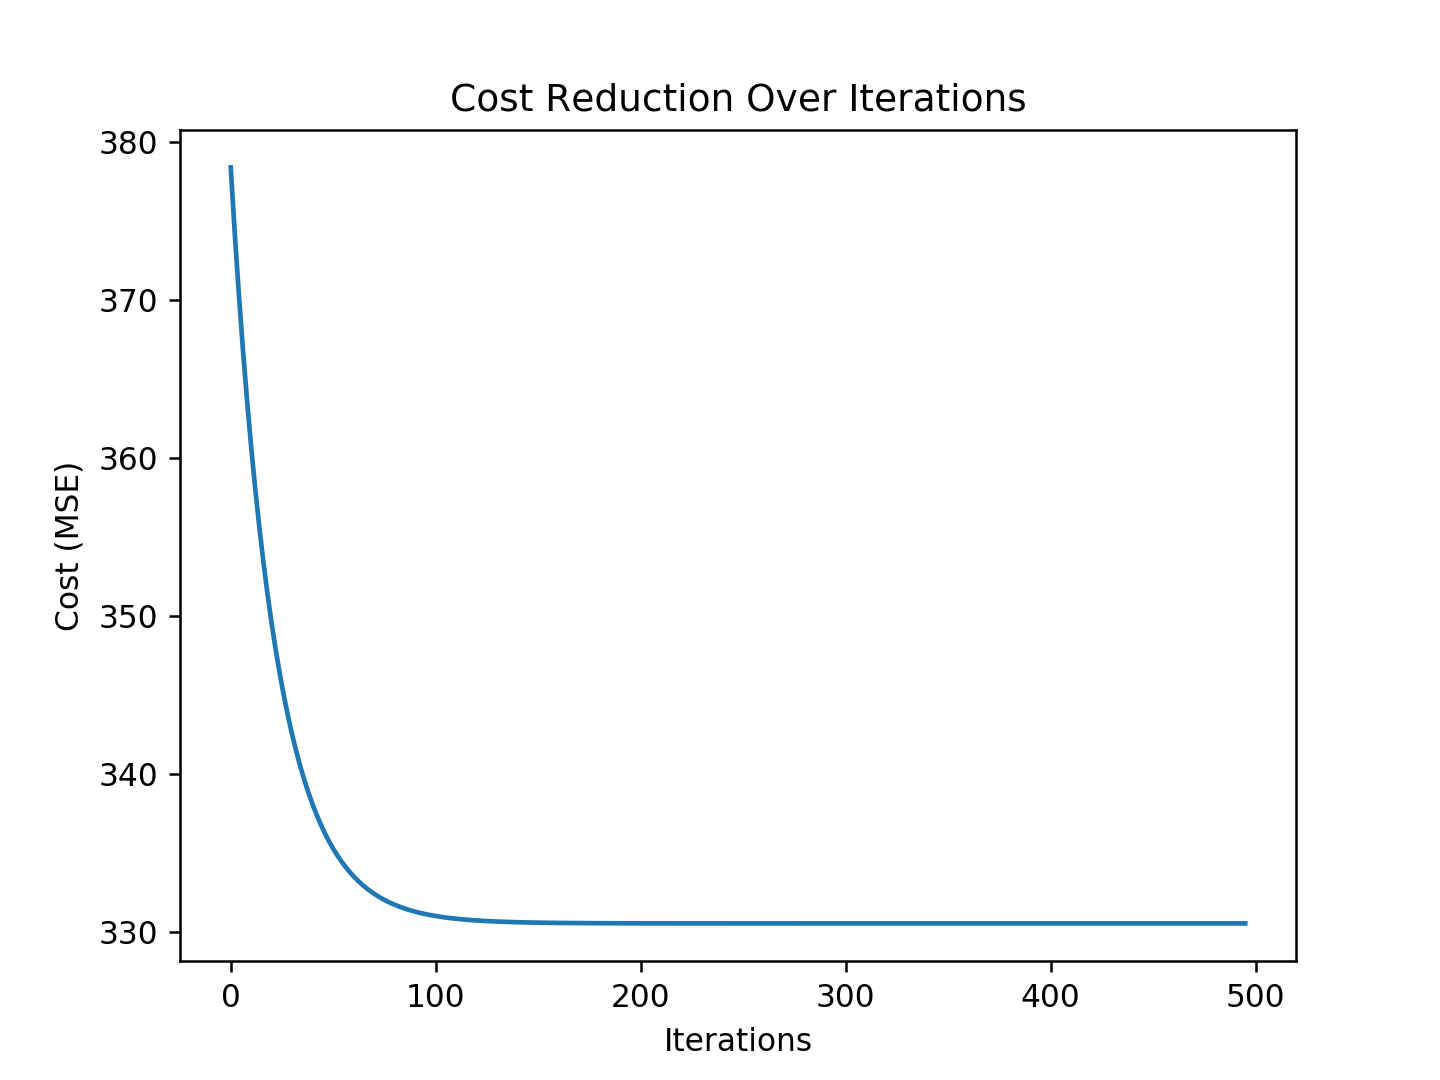

In [10]:
# Plot cost reduction over some iterations (only the first few where cost drop is steep)
%matplotlib notebook
div = 40
shift = int(div / 10)
plt.plot(range(int(epochs / div - shift)), [costs[div * shift:][i] for i in range(len(costs[div * shift:])) if i % div == 0])
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost Reduction Over Iterations')
plt.show()

## 5.1 Visualizing the Gradient Descent
Using the plot surface function we can plot the surface of the MSE function over a range of possible weights and biases. The numpy meshgrid function with a modified version of the same cost function provides the data for the surface plot, and the weights, biases, and costs logged during the training provide coordinates of the descent over the iterations. Clearly, in the first few iterations, the minimum is overshot. This can be prevented by lowering the learning rate, however experimentally, this results in it reaching the final values too slowly. 

<IPython.core.display.Javascript object>


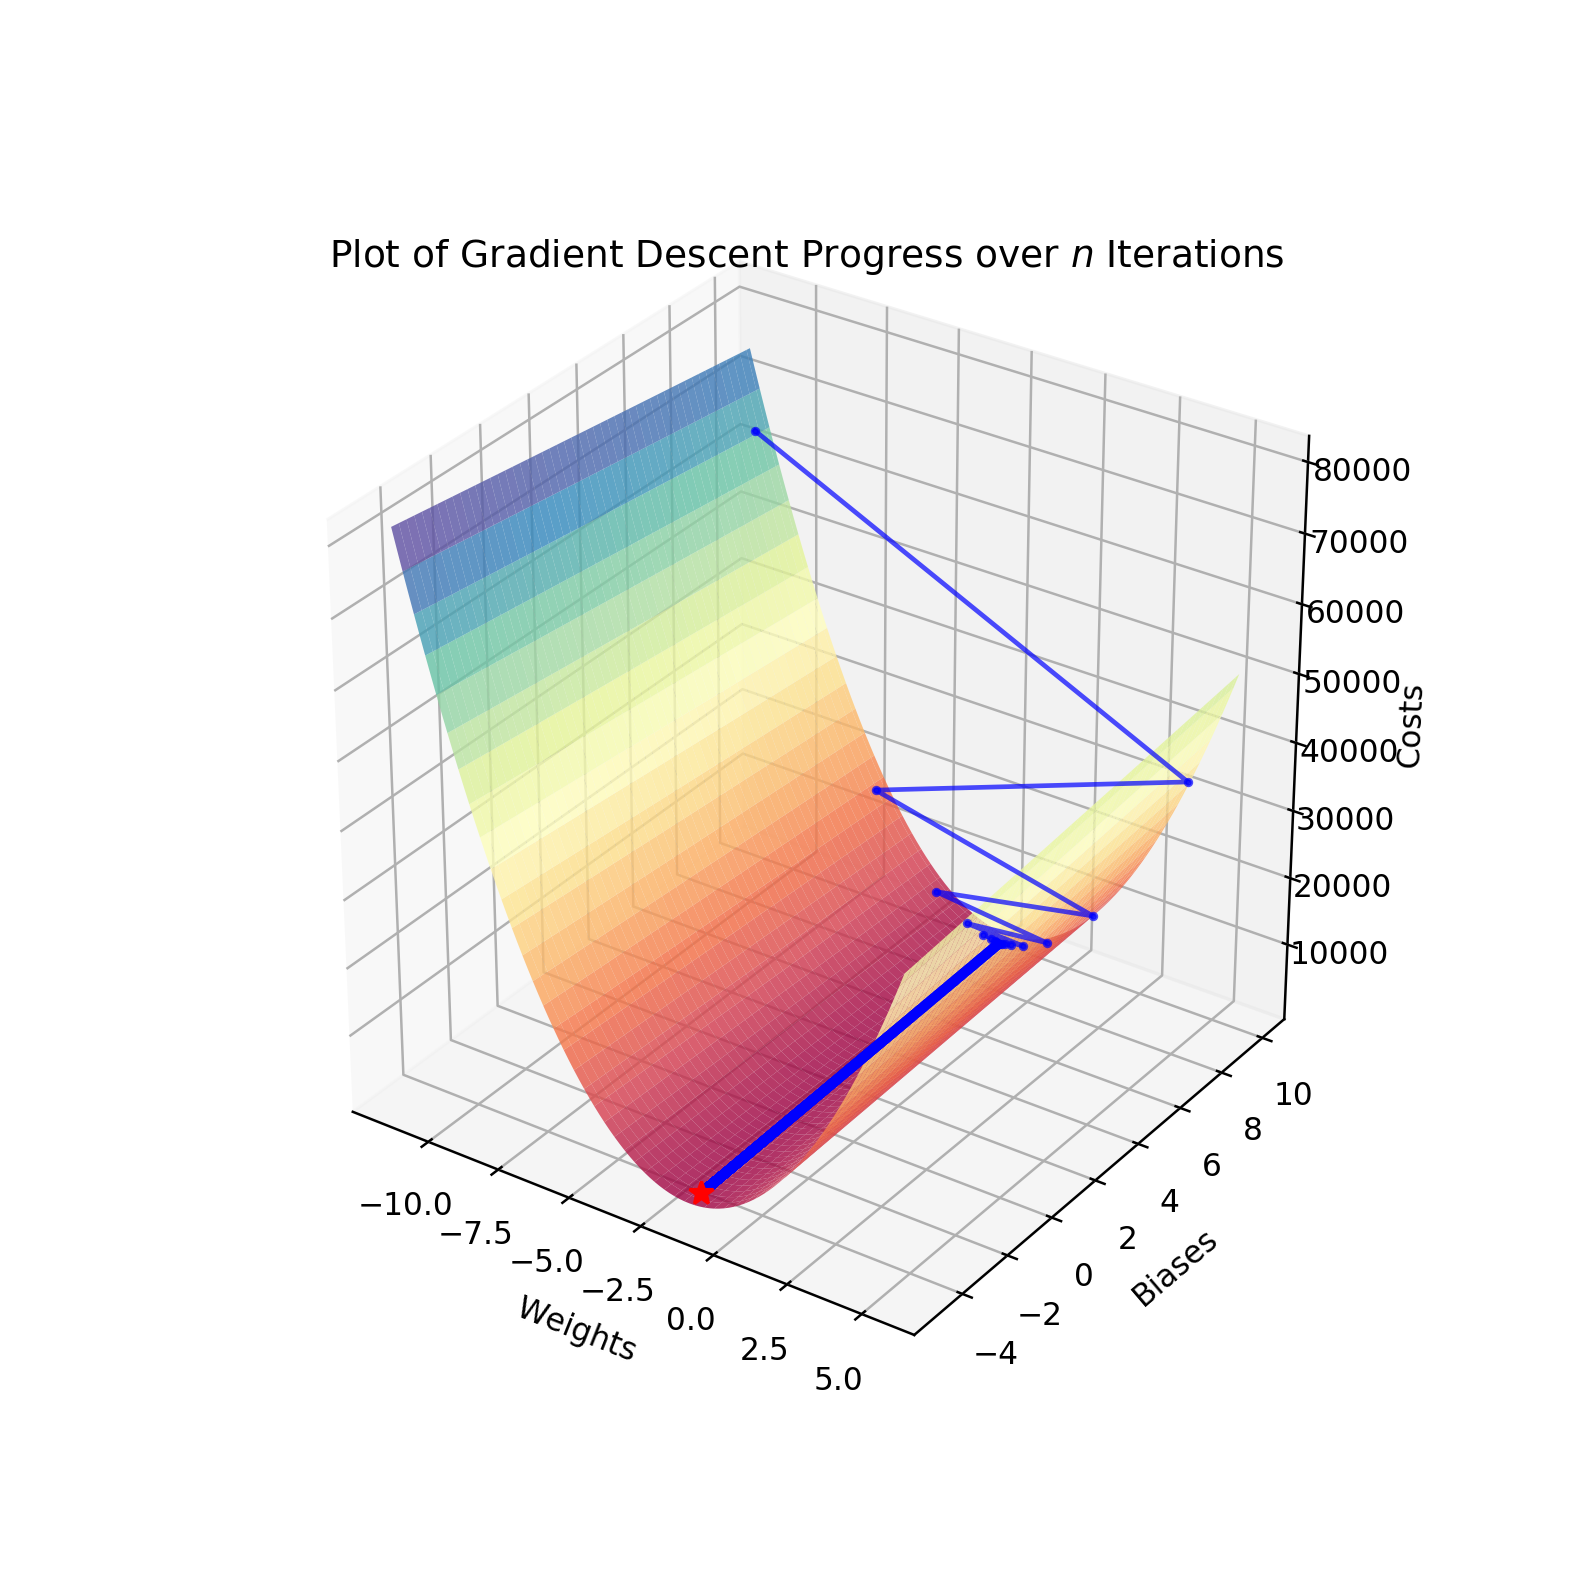

In [9]:
%matplotlib notebook

# This is essentially the same computation as the cost function (mean square error)
def MSE(w: 'array', b: 'array'):
    n = len(x) 
    return (1/n) * sum([((y[i] - (w * x[i] + b)) ** 2) for i in range(n)])

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection="3d")

min_w, max_w = min(weights), max(weights)
min_b, max_b = min(biases), max(biases)

w = np.linspace(int(min_w) - 1.5, int(max_w) + 1.5, 100)  # Generate array for weights
b = np.linspace(int(min_b) - 1, int(max_b) + 1, 100)  # Generate array for biases
wx, by = np.meshgrid(w, b)  # Meshgrid of weights and biases (x vals, y vals)
cz = MSE(wx, by)  # Get cost for meshgrid of weights and biases (z vals) 

ax.set_title("Plot of Gradient Descent Progress over $n$ Iterations")
ax.set_xlabel("Weights")
ax.set_ylabel("Biases")
ax.set_zlabel("Costs")

ax.plot_surface(wx, by, cz, cmap="Spectral", alpha=0.8, label="Cost function")  # Surface of gradient
ax.plot(weights, biases, costs, 'ob-', markersize=2, alpha=0.7, label="Gradient descent")  # Progress over training
ax.plot([coeff], [const], [lobf_cost], 'r*', markersize=8, label="Found Minimum")  # Goal, least square fit minimum

plt.show()